In [1]:
import os
import pandas as pd
import numpy as np
import json
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import linregress
import torch
from transformers import AutoTokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

In [2]:
os.chdir('/Users/adamnovak/Desktop/EPO/EPO-Hackahton/notebooks')

In [3]:
f=open('/Users/adamnovak/Desktop/EPO/EPO-Hackahton/epo/data/ml_datasets/claims_dataset_with_titles_with_classes.json')
data=json.load(f)

In [4]:
# Text Mining and analysis #

class Claims: 
    
    def __init__(self, dataset: list, cl: list): 
        self.dataset=dataset
        self.cl=cl
        self.split=self.extract_text(self.parse_classes())
        self.combined=self.combine_text()
        self.count=Counter(self.combined.split(" "))
        
    def parse_classes(self):
        return list(filter(lambda x: x["main_classification_symbol"] in self.cl, self.dataset))

    def extract_text(self, text: list):
        return [text[i]["claim-text"] for i in range(len(text)) if text[i]["claim-text"]!=None]
    
    def combine_text(self):
        parsed=self.parse_classes()
        extracted=self.extract_text(parsed)
        combined="".join(extracted)
        return combined 
    
    def most_frequent(self, num: int):
        return self.count.most_common(num)
        


In [5]:
sustainable=Claims(data,['Y'])
not_sustainable=Claims(data,['A','B','C','D','E','F','G','H'])

In [6]:
sust_common=sustainable.most_frequent(200)
nonsust_common=not_sustainable.most_frequent(200)

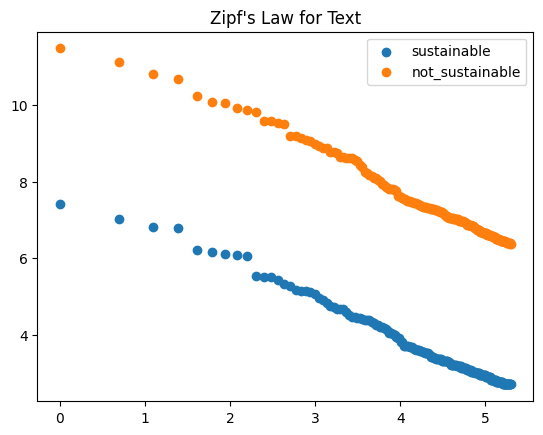

In [13]:
x_axis=[np.log(k) for k in range(1,201)]
plt.scatter(x_axis,[np.log(v) for (u,v) in sust_common])
plt.scatter(x_axis,[np.log(v) for (u,v) in nonsust_common])
plt.title("Zipf's Law for Text")
plt.legend(labels=["sustainable","not_sustainable"])
plt.show()

In [14]:
slope_sust=linregress(x_axis,[np.log(v) for (u,v) in sust_common]).slope
slope_nonsust=linregress(x_axis,[np.log(v) for (u,v) in nonsust_common]).slope

slope_sust, slope_nonsust

(-1.0058397549763851, -1.095153421858193)

In [7]:
# Starting BERT Analysis #

model_name='distilbert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_name)

In [8]:
inp=sustainable.split
output=tokenizer.encode_plus(inp[0],
                            add_special_tokens=True,
                            padding="max_length",
                            max_length=20,
                            return_tensors='pt',
                            truncation=True,
                            return_attention_mask=True)

In [13]:
vocab=tokenizer.get_vocab()
inverse_vocab={u:v for v,u in vocab.items()}

In [20]:
tok=" ".join([inverse_vocab[i] for i in output["input_ids"].tolist()[0]])

In [21]:
tok

'[CLS] a carbon blade ( 1 ) for a wind turbine , comprising : [SEP] [PAD] [PAD] [PAD] [PAD] [PAD]'